<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/resampling-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [27]:
library(tidyverse)
library(boot)

setwd('/Users/letian/Desktop/huang_DSPN_S25/Homework')
dat <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv')

d1 <- select(dat, Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol)
d1 <- na.omit(d1)

head(d1)
dim(d1)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


[1] 1113    6

(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

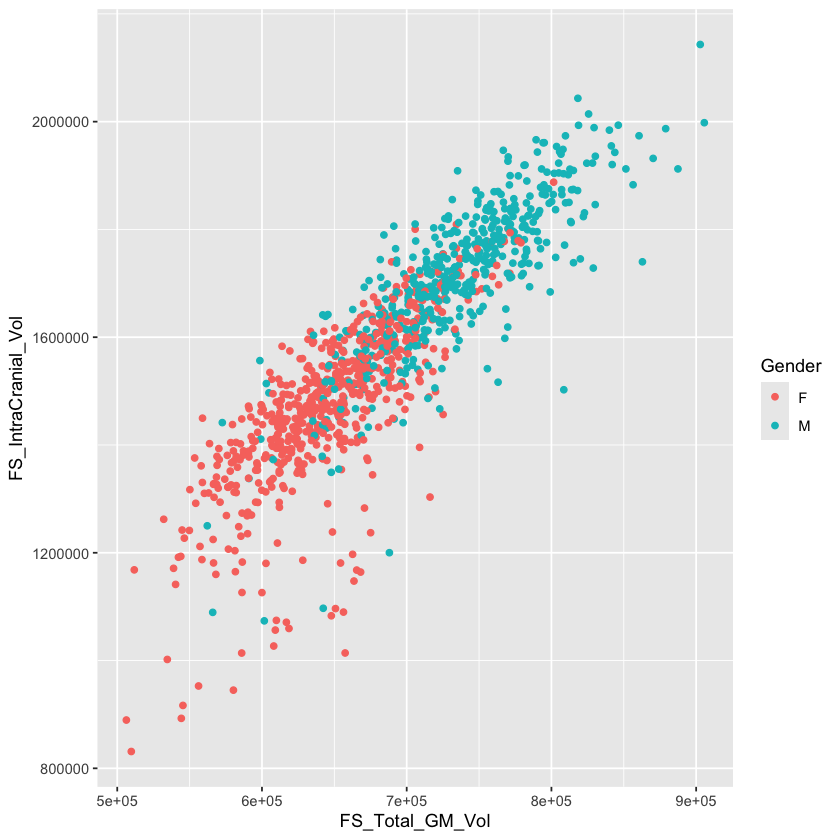

In [14]:
ggplot(d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, by = Gender)) +
    geom_point(aes(color = Gender))

What patterns do you observe in the scatter plot?

> For all gender, grey matter volume is positively correlated with intracranial volume. Females have generally smaller grey matter volume and intracranial volume than males.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [39]:
d1$Gender <- as.factor(d1$Gender)
glm_mod = glm(Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + FS_Total_GM_Vol, data = d1, family = binomial)
summary(glm_mod)


Call:
glm(formula = Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + 
    FS_Total_GM_Vol, family = binomial, data = d1)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> Total grey matter volume and intracranial volume are significantly associated with gender.

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [59]:
glm_prob_df = data.frame(predict(glm_mod, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')
glm_prob_df$predicted_binary = rep("F", nrow(glm_prob_df))

glm_prob_df$predicted_binary[glm_prob_df$predicted_prob > .50] = "M"

accuracy <- mean(glm_prob_df$predicted_binary == d1$Gender)
accuracy

[1] 0.8203055

What is the prediction accuracy for gender from the full model?

> The prediction accuracy for gender from the full model is about 82%.

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original     bias    std. error
t1* 0.8203055 -0.3150431  0.01517996


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

[1] "0.475509632781485 0.535015075214921"


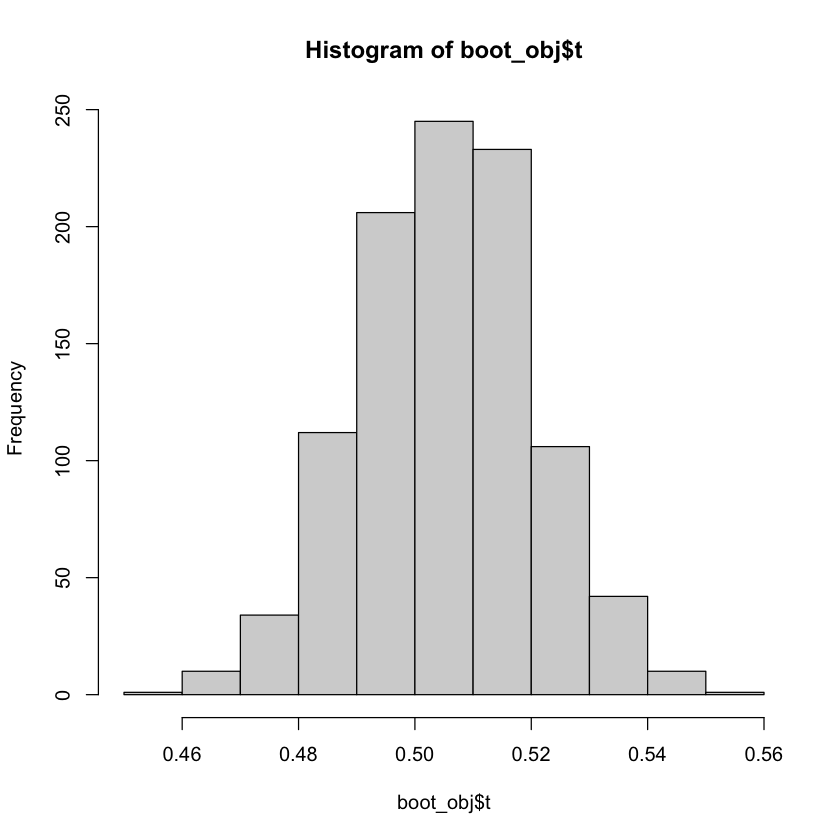

In [67]:
boot.fn <- function(data, index){
    mod <- glm(Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + FS_Total_GM_Vol, data = data, family = binomial, subset = index)
    glm_prob_df = data.frame(predict(mod, type = "response"))
    colnames(glm_prob_df) = c('predicted_prob')
    glm_prob_df$predicted_binary = rep("F", nrow(glm_prob_df))

    glm_prob_df$predicted_binary[glm_prob_df$predicted_prob > .50] = "M"
    return(mean(glm_prob_df$predicted_binary == data$Gender))}

boot_obj = boot(d1, boot.fn, R = 1000)
print(boot_obj)

attributes(boot_obj)
hist(boot_obj$t)
CI_low <- mean(boot_obj$t) - 1.96 * sd(boot_obj$t)
CI_high <- mean(boot_obj$t) + 1.96 * sd(boot_obj$t)
print(paste(CI_low, CI_high))

How robust is the prediction accuracy of the full model?

> The prediction accuracy is not very robust because the 95% CI is .48 to .54 and includes .5, which refers to the chance level for binomial classification models. Also, the prediction accuracy obtained from original model is .82, which is outside of the 95% CI of bootstrapped result.

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

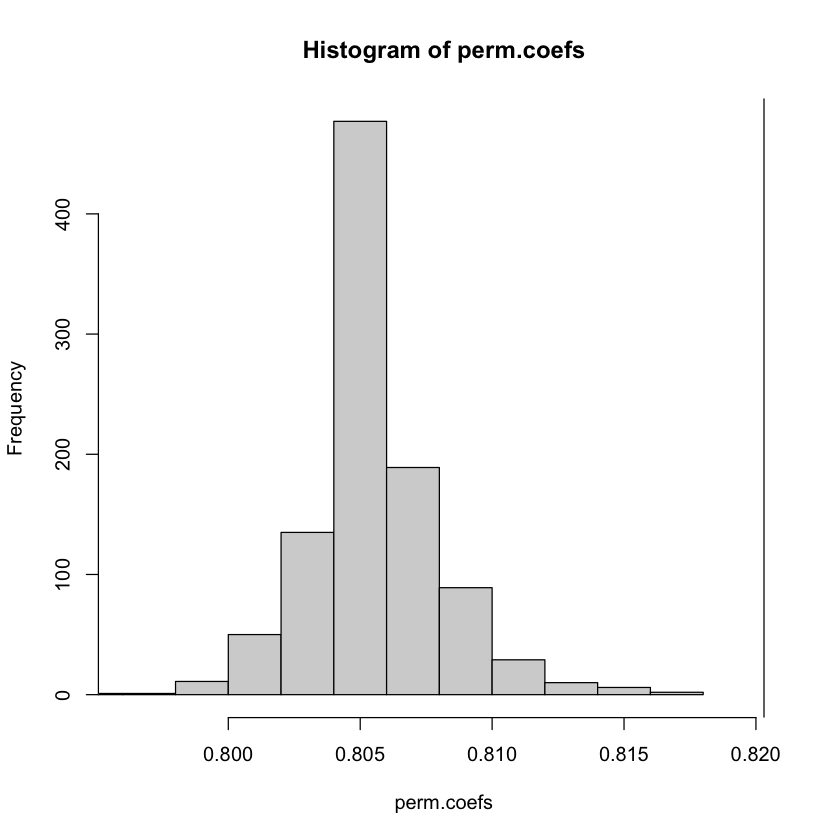

In [64]:
permd1 = d1 #want to preserve the non-permuted, true form of data!

# Set the number of iterations
R = 1000

perm.accuracies = matrix(NA, nrow = R, ncol = 1) #filling with nas at first

for (i in 1:R){
  permd1$FS_Total_GM_Vol = permd1$FS_Total_GM_Vol[sample(1113)]
  mod <- glm(Gender ~ FS_IntraCranial_Vol + FS_Tot_WM_Vol + FS_Total_GM_Vol, data = permd1, family = binomial)
  glm_prob_df = data.frame(predict(mod, type = "response"))
  colnames(glm_prob_df) = c('predicted_prob')
  glm_prob_df$predicted_binary = rep("F", nrow(glm_prob_df))
  glm_prob_df$predicted_binary[glm_prob_df$predicted_prob > .50] = "M"

  perm.accuracies[i,] = mean(glm_prob_df$predicted_binary == permd1$Gender)}

# Take a look at the null distributions
real.acc <- accuracy
hist(perm.coefs, xlim = c(min(perm.accuracies), real.acc))
abline(v = real.acc)

How much does the grey matter volume influence the prediction accuracy of the model?

> The original accuracy falls outside of and above the permutated accuracie, which means that grey matter contribute significantly to the prediction accuracy of the model.

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> In bootstrapping, subsets of many pairs of Xs and Y are randomly sampled with replacement and then we get values for statistics of interest from each subset. This helps to create a range of potential values for the statistics of interest given the variability in the collected data. It is appropriate to use when the goal is to get confidence intervals or estimate uncertainties for a given statistic.

In permutations, we break the relationship between variables of interest while maintaining the structure of other variables. For example, we can resampling X without replacement and shuffles the relationship between X and Y. This allows null hypothesis testing. It will generate a null distribution of the relationship between targeted X and Y; if the observed relationship is outside of that null distribution, then there's evidence against null hypothesis. It is appropriate to use when we want to test null hypothesis.

**DUE:** 5pm EST, March 27, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*